In [80]:
import time 
import hamiltonian_exponentiation as h
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.join("..", "..", "Libraries","QML_lib"))
from ModelGeneration import random_model_name
from DataBase import operator


save_plots = False
min_qubit = 1
max_qubit = 6
num_tests = 1
qubits = range(min_qubit, max_qubit+1)

times = {}
minimum_times = []
average_times=[]
min_times_dict = {}
avg_times_dict = {}

for num_qubits in range(min_qubit, 1+max_qubit):
    times[num_qubits] = 0

    
for num_qubits in qubits:
    min_time = 1
    for i in range(num_tests):
        mod = random_model_name(num_dimensions=num_qubits)
        op = operator(mod)
        hamiltonian = op.matrix
        before = time.time()
        store = h.exp_ham(hamiltonian, 1)
        after = time.time()
        if after-before < min_time :
            min_time = after - before
        times[num_qubits] += after - before
    minimum_times.append(min_time)

for q in qubits: 
    average_times.append(times[q]/num_tests)
    min_times_dict[q] = minimum_times[q-1]
    avg_times_dict[q] = average_times[q-1]
    

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


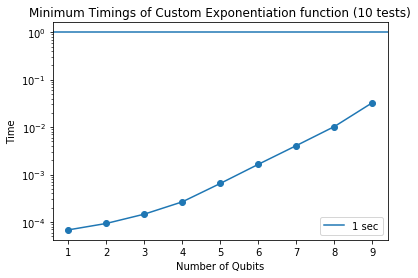

In [74]:
description = '_times_local_machine_upto_'+str(max_qubit)+'_qubits'
title_description = ' Timings of Custom Exponentiation function (' + str(num_tests) + ' tests)'

if save_plots: 
    plt.clf()
    x=qubits
    y=average_times
    plt.ylabel('Time')
    plt.xlabel('Number of Qubits')
    plt.title('Average'+title_description)
    plt.axhline(y=1, label='1 sec')
    plt.legend()
    plt.semilogy(x,y, marker='o')
    plt.savefig('Avergage'+description)


    ## Minumum timings
    plt.clf()
    x=qubits
    y=minimum_times
    plt.ylabel('Time')
    plt.xlabel('Number of Qubits')
    plt.title('Minimum'+title_description)
    plt.axhline(y=1, label='1 sec')
    plt.legend()
    plt.semilogy(x,y, marker='o')
    plt.savefig('Minimum'+description)




/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


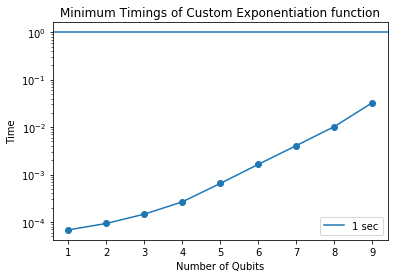

In [75]:
minimum_times

[6.818771362304688e-05,
 9.322166442871094e-05,
 0.00014638900756835938,
 0.00026607513427734375,
 0.0006506443023681641,
 0.0016472339630126953,
 0.0040895938873291016,
 0.010304450988769531,
 0.03287506103515625]

In [77]:
import numpy as np

In [82]:
reload = np.load('min_times.npy')

In [83]:
reload

array({1: 0.00012636184692382812, 2: 0.0001010894775390625, 3: 0.00017404556274414062, 4: 0.00035119056701660156, 5: 0.0010120868682861328, 6: 0.003027200698852539}, dtype=object)

In [85]:
import time 
import hamiltonian_exponentiation as h
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.path.join("..", "..", "Libraries","QML_lib"))
from ModelGeneration import random_model_name
from DataBase import operator


import argparse
parser = argparse.ArgumentParser(description='Evaluate timings for exp_ham function.')


parser.add_argument(
  '-p', '--plots', 
  help="Save plots: True or False",
  type=bool,
  default=False
)

parser.add_argument(
  '-m', '--machine_type', 
  help="Describe machine. i.e. Local, Cluster_Backend, Cluster_Frontend, etc.",
  type=str,
  default='Local'
)

parser.add_argument(
  '-min',
  help="Minimum qubit number to test.",
  type=int,
  default=1
)
parser.add_argument(
  '-max',
  help="Minimum qubit number to test.",
  type=int,
  default=10
)
parser.add_argument(
  '-tests',
  help="Number of tests to run.",
  type=int,
  default=10
)




arguments = parser.parse_args()
machine_type = arguments.machine_type
save_plots = arguments.plots
min_qubit = arguments.min
max_qubit = arguments.max
num_tests = arguments.tests
qubits = range(min_qubit, max_qubit+1)

times = {}
min_times_dict=[]
avg_times_dict=[]
minimum_times = []
average_times=[]

for num_qubits in range(min_qubit, 1+max_qubit):
    times[num_qubits] = 0

    
for num_qubits in qubits:
    min_time = 1
    for i in range(num_tests):
        mod = random_model_name(num_dimensions=num_qubits)
        op = operator(mod)
        hamiltonian = op.matrix
        before = time.time()
        store = h.exp_ham(hamiltonian, 1)
        after = time.time()
        if after-before < min_time :
            min_time = after - before
        times[num_qubits] += after - before
    minimum_times.append(min_time)


for q in qubits: 
    average_times.append(times[q]/num_tests)

for qub in qubits:
    q = int(qub)
    avg_times_dict[q] = average_times[q-1]
    min_times_dict[q] = minimum_times[q-1]



# Plots





description = '_times_'+machine_type+'_machine_upto_'+str(max_qubit)+'_qubits'
title_description = ' Timings of Custom Exponentiation function (' + str(num_tests) + ' tests; ', machine_type, ')'

if save_plots:
    # Average timings
    method='Average'
    plt.clf()
    x=qubits
    y=average_times
    plt.ylabel('Time')
    plt.xlabel('Number of Qubits')
    plt.title(str(method)+str(title_description))
    plt.axhline(y=1, label='1 sec')
    plt.legend()
    plt.semilogy(x,y, marker='o')
    plt.savefig('Avergage'+description)


    ## Minumum timings
    method='Minimum'
    plt.clf()
    x=qubits
    y=minimum_times
    plt.ylabel('Time')
    plt.xlabel('Number of Qubits')
    plt.title(str(method)+str(title_description))
    plt.axhline(y=1, label='1 sec')
    plt.legend()
    plt.semilogy(x,y, marker='o')
    plt.savefig('Minimum'+description)

    np.save("times_"+machine_type+"_"+str(method)+".npy", min_times_dict)
    np.save("avg_times_"+machine_type+"_"+str(method)+".npy", avg_times_dict)    


    

usage: ipykernel_launcher.py [-h] [-p PLOTS] [-m MACHINE_TYPE] [-min MIN]
                             [-max MAX] [-tests TESTS]
ipykernel_launcher.py: error: unrecognized arguments: -f /run/user/317852/jupyter/kernel-1d53eb48-eba1-4979-a5c7-981358760f9d.json


SystemExit: 2

/home/bf16951/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
